In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import SVC

In [3]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy =np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Text(0, 0.5, 'sepal_width')

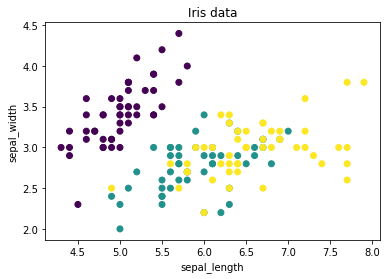

In [4]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
plt.scatter (X[:, 0], X[:, 1], c = iris.target)
plt.title("Iris data")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

In [19]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

C_range =  [1.,3.,5.,10.,40.,60.,80.,100.]
# C_range = np.arange(1.,100.)
gamma_range = np.logspace(-9, 3, 13)
# gamma_range = np.arange(1.,100.)
param_grid = dict( gamma=gamma_range, C=C_range)
param_grid_ = dict(C=C_range)

degree_range = np.arange(1,10)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid_ = GridSearchCV(SVC(kernel="linear"),param_grid=param_grid_, cv=cv)
grid_a = GridSearchCV(SVC(kernel="poly"),param_grid=param_grid, cv=cv)

grid_a.fit(X, y)
grid_.fit(X, y)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f" % (grid_a.best_params_, grid_a.best_score_))
print("The best parameters are %s with a score of %0.2f" % (grid_.best_params_, grid_.best_score_))
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

C = []
gamma = []

X = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

for this_C in C_range:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,y_train)
    scoretrain = clf.score(X_train, y_train)
    scoretest = clf.score(X_test, y_test)
    C.append(scoretest)
    print("Linear SVM value of C:{}, Test Score: {:2f}\n".format(this_C,scoretrain,scoretest))

C = C_range[C.index(max(C))]
print("C: ",C)

The best parameters are {'gamma': 0.01, 'C': 40.0} with a score of 0.98
The best parameters are {'C': 1.0} with a score of 0.98
The best parameters are {'gamma': 0.1, 'C': 3.0} with a score of 0.98
Linear SVM value of C:1.0, Test Score: 0.786667

Linear SVM value of C:3.0, Test Score: 0.773333

Linear SVM value of C:5.0, Test Score: 0.786667

Linear SVM value of C:10.0, Test Score: 0.786667

Linear SVM value of C:40.0, Test Score: 0.786667

Linear SVM value of C:60.0, Test Score: 0.786667

Linear SVM value of C:80.0, Test Score: 0.786667

Linear SVM value of C:100.0, Test Score: 0.786667

C:  5.0


In [ ]:
C = []
gamma = []
for this_gamma in [.01,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,y_train)
        clf3train = clf3.score(X_train,y_train)
        clf3test  = clf3.score(X_test,y_test)
        C.append(scoretest)
        gamma.append(scoretest)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))
        
C = [1,5,7,10,15,25,50][C.index(max(C))]
gamma = [.01,.5,.10,.25,.50,1][gamma.index(max(gamma))]
print("C: {} gamma: {}".format(C, gamma))

In [ ]:
C = []
gamma = []
for this_gamma in [.01,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3 = SVC(kernel='poly',C=this_C,gamma=this_gamma,degree=3).fit(X_train,y_train)
        clf3train = clf3.score(X_train,y_train)
        clf3test  = clf3.score(X_test,y_test)
        C.append(scoretest)
        gamma.append(scoretest)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))
        
C = [1,5,7,10,15,25,50][C.index(max(C))]
gamma = [.01,.5,.10,.25,.50,1][gamma.index(max(gamma))]
print("C: {} gamma: {}".format(C, gamma))

In [ ]:
models = (svm.SVC(kernel='linear', C=C),
         svm.LinearSVC(C=C, max_iter=10000),
         svm.SVC(kernel='rbf', gamma=0.7, C=C),
         svm.SVC(kernel='poly',degree=3,gamma='auto',C=C))
models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [13]:
np.arange(1.,100.)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
       92., 93., 94., 95., 96., 97., 98., 99.])

In [26]:
np.logspace(-9, 1, 11)

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01])